# Optimization Test Problems

Wednesday, February 19th, 2025

In [78]:
# Import necessary librariies
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Visualizations of select functions

#### Define a function to handle visualizing functions

In [79]:
def visualize_func(x1, x2, y, func_name="", xlim=None):
    # plot 3d graph of function
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection="3d")
    ax.plot_surface(x1, x2, y, cmap="plasma")
    ax.set_title(f"{func_name} Function Visualization")
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_zlabel("y")
    ax.set_xlim(xlim)
    ax.view_init(elev=30, azim=45)
    plt.show()

### Six hump camel function

In [80]:
# Define the Six hump camel function
def six_hump_camel_func(x1, x2):
    return (4 - 2.1 * x1**2 + (x1**4) / 3) * x1**2 + x1 * x2 + (-4 + 4 * x2**2) * x2**2

In [144]:
# Sample points on x1 and x2 axis
x1 = np.linspace(-3, 3, 100)
x2 = np.linspace(-2, 2, 100)
x1, x2 = np.meshgrid(x1, x2)

# Generate values of the 3rd axis
y = six_hump_camel_func(x1, x2)

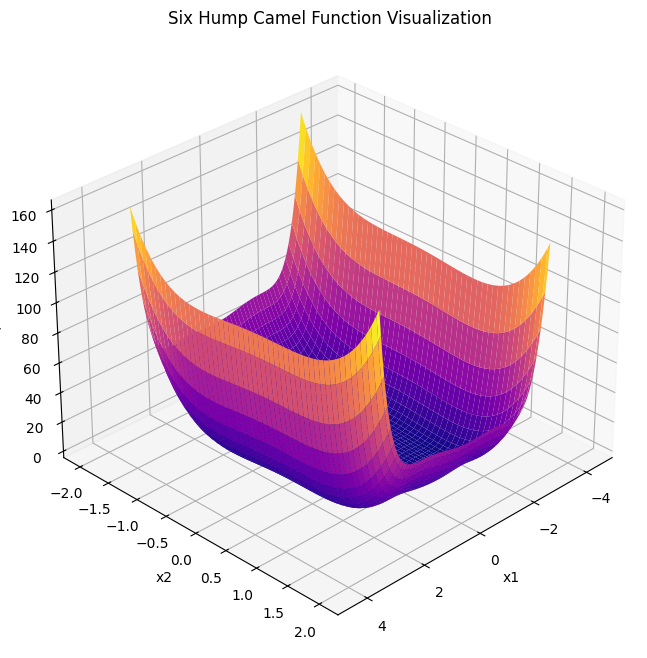

In [145]:
visualize_func(x1, x2, y, func_name="Six Hump Camel", xlim=[-5, 5])


### Michalewicz function

In [83]:
# Define the Michalewicz function in terms of tensorflow
def michalewicz_func(x1, x2, m=10):
    y = 0
    y -= tf.sin(x1) * (tf.sin(1 * x1**2 / np.pi) ** (2 * m))
    y -= tf.sin(x2) * (tf.sin(2 * x2**2 / np.pi) ** (2 * m))
    return y

In [84]:
# Test function
michalewicz_func(2.20, 1.57).numpy()

np.float32(-1.8011413)

In [85]:
# Sample points on x1 and x2 axis
x1 = np.linspace(0, np.pi, 100, dtype=np.float32)
x2 = np.linspace(0, np.pi, 100, 100, dtype=np.float32)
x1, x2 = np.meshgrid(x1, x2)

# x1 and x2 as tensors
x1_tf = tf.convert_to_tensor(x1, dtype=tf.float32)
x2_tf = tf.convert_to_tensor(x2, dtype=tf.float32)

y_tf = michalewicz_func(x1,x2) # corresponding y output of function

y = y_tf.numpy() # convert to numpy for visualization

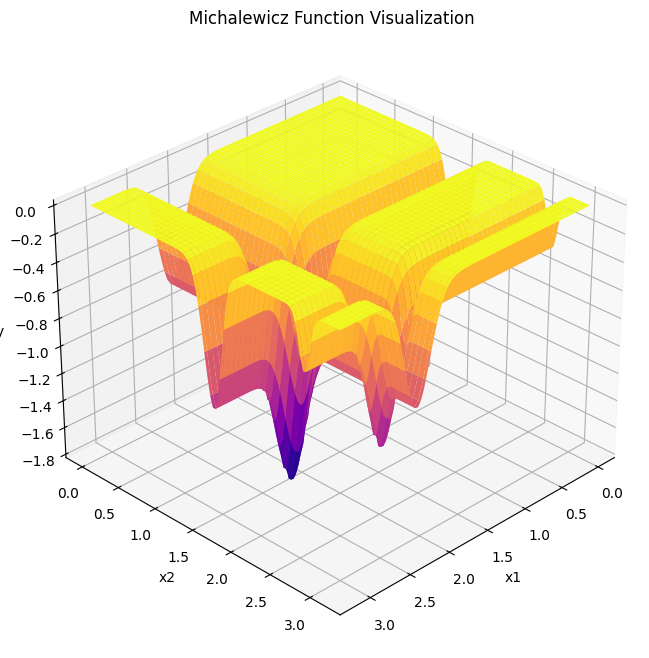

In [86]:
# Visualize Michalewicz function
visualize_func(x1, x2, y, func_name="Michalewicz")

### Ackley Function

In [87]:
# Define ackley function
def ackley_func(x1, x2, a=20.0, b=0.2, c=2.0 * np.pi):
    
    sum1 = x1**2 + x2**2
    sum2 = tf.cos(c * x1) + tf.cos(c * x2)
    
    term1 = -a * tf.exp(-b * tf.sqrt(sum1 / 2))
    term2 = -tf.exp(sum2 / 2)
    
    return term1 + term2 + a + tf.exp(1.0)

In [ ]:
# Sample points on x1 and x2 axis
x1 = np.linspace(-32.768, 32.768, 100, dtype=np.float32)
x2 = np.linspace(-32.768, 32.768, 100, dtype=np.float32)
x1, x2 = np.meshgrid(x1, x2)

y = ackley_func(x1, x2)

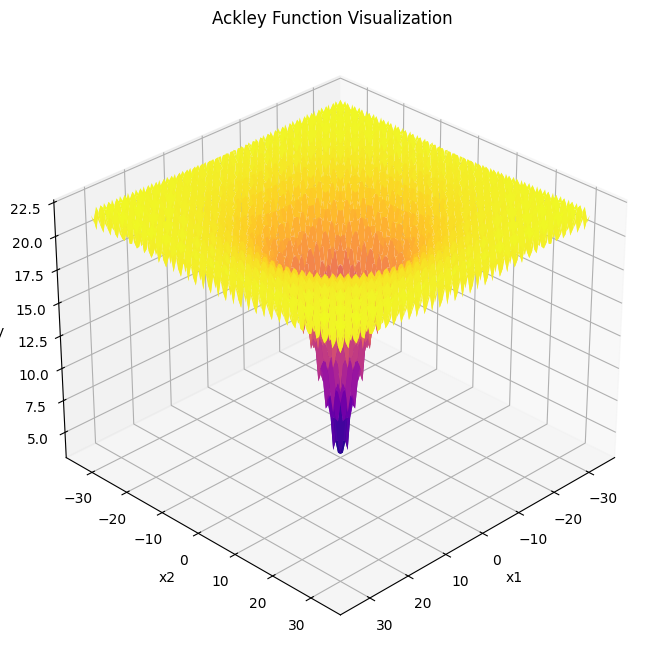

In [89]:
# Visualize Ackley function
visualize_func(x1, x2, y, func_name="Ackley")

### Trid Function

In [95]:
# Define the Trid function
def trid_func(x1, x2):
    term1 = (x1 - 1)**2 + (x2 - 1)**2
    term2 = x1 * x2
    return term1 - term2

In [96]:
# Sample points on x1 and x2 axis
x1 = np.linspace(-25, 25, 100)
x2 = np.linspace(-25, 25, 100)
x1, x2 = np.meshgrid(x1, x2)
y = trid_func(x1, x2)

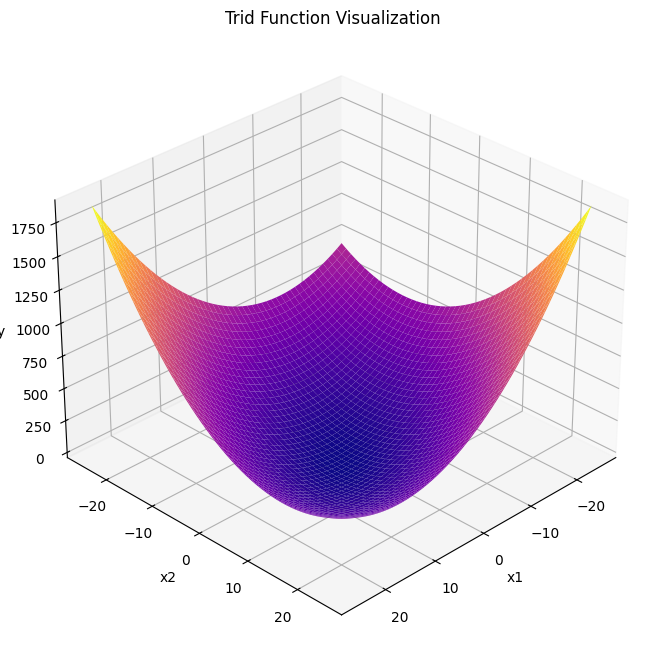

In [97]:
# Visualize Trid function
visualize_func(x1, x2, y, func_name="Trid")

## Explaining the problem to myself

#### 1. Function: 

Given a function  $f(x, y)$ , your goal is to minimize it using gradient descent. This means finding the point $(\hat x, \hat y)$ where the gradient of $f(x, y)$  is zero (or close).

#### 2. Gradient Descent

The gradient of  f(x, y)  is a vector containing the partial derivatives:

$\nabla f(x, y) = \left( \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y} \right)$

At each step of gradient descent, you need to update both x and y based on the gradient:

$x_{\text{new}} = x - \eta \frac{\partial f}{\partial x}$


$y_{\text{new}} = y - \eta \frac{\partial f}{\partial y}$


## Optimizers with `tf.GradientTape`

#### Stochastic Gradient Descent (SGD) - `tf.GradientTape`

In [90]:
def sgd_tape(test_func, max_iters=100000, learning_rate=0.001, initial_guess = None):
    if initial_guess is None:
        initial_guess = [0.1, 0.1]

    grad_points = []
    
    # initialize weights
    w1 = tf.Variable(initial_guess[0], dtype=tf.float32)
    w2 = tf.Variable(initial_guess[1], dtype=tf.float32)
    
    pred_1 = test_func(w1, w2)
    grad_points.append([float(w1), float(w2), float(pred_1)])
    
    for t in range(1, max_iters + 1):
        with tf.GradientTape() as tape:
            y = test_func(w1, w2)
            
        df_dw1, df_dw2 = tape.gradient(y, [w1, w2])
        
        w1.assign_sub(learning_rate * df_dw1)
        w2.assign_sub(learning_rate * df_dw2)
        
        pred_2 = test_func(w1, w2).numpy() # current prediction
        
        if abs(pred_2 - pred_1) < 1e-13: # stopping criterion
            print(f"Converged on {t}th iteration")
            break
        pred_1 = pred_2

        if t % 10 == 0:
            grad_points.append([float(w1), float(w2), float(test_func(w1, w2))])
        
        if t % 100 == 0:
            print(f"Iter {t}th - x1 = {float(w1)}, x2 = {float(w2)}, y = {float(test_func(w1, w2))}")
            
    print(f"\nx1: {float(w1)}, x2: {float(w2)}")
    print("At x1 & x2, y =", float(test_func(w1, w2)))
    
    return grad_points

In [94]:
sgd_tape(michalewicz_func)

Converged on 1th iteration

x1: 0.10000000149011612, x2: 0.10000000149011612
At x1 & x2, y = 0.0


[[0.10000000149011612, 0.10000000149011612, 0.0]]

## Vanilla Momentum Optimizer - `tf.GradientTape`

In [107]:
def momentum_tape(test_func, max_iters=100000, learning_rate=0.001, initial_guess = None):
    if initial_guess is None:
        initial_guess = [0.1, 0.1]
    
    grad_points = []
    
    # initialize weights
    w1 = tf.Variable(initial_guess[0], dtype=tf.float32)
    w2 = tf.Variable(initial_guess[1], dtype=tf.float32)
    
    # initialize momentum
    m1 = tf.Variable(0.0, tf.float32)
    m2 = tf.Variable(0.0, tf.float32)
    
    beta = 0.9 # friction
    
    pred_1 = test_func(w1, w2)
    grad_points.append([float(w1), float(w2), float(pred_1)])
    
    for t in range(1, max_iters + 1):
        with tf.GradientTape() as tape:
            y = test_func(w1, w2)
            
        df_dw1, df_dw2 = tape.gradient(y, [w1, w2])
        
        m1.assign(beta * m1 - learning_rate * df_dw1)
        m2.assign(beta * m2 - learning_rate * df_dw2)
        
        w1.assign_add(m1)
        w2.assign_add(m2)
        
        pred_2 = test_func(w1, w2).numpy() # current prediction
        
        if abs(pred_2 - pred_1) < 1e-13: # stopping criterion
            print(f"Converged on {t}th iteration")
            break
        pred_1 = pred_2

        if t % 100 == 0:
            grad_points.append([float(w1), float(w2), float(test_func(w1, w2))])
        
        if t % 100 == 0:
            print(f"Iter {t}th - x1 = {float(w1)}, x2 = {float(w2)}, y = {float(test_func(w1, w2))}")
            
    print(f"\nx1: {float(w1)}, x2: {float(w2)}")
    print("At x1 & x2, y =", float(test_func(w1, w2)))
    
    return grad_points

In [ ]:
momentum_tape(six_hump_camel_func)

## Nesterov Accelerated Gradient Optimizer - `tf.GradientTape`

In [105]:
def nesterov_acc_tape(test_func, max_iters=100000, learning_rate=0.001, initial_guess = None):
    if initial_guess is None:
        initial_guess = [0.1, 0.1]
    
    grad_points = []
    
    # initialize weights
    w1 = tf.Variable(initial_guess[0], dtype=tf.float32)
    w2 = tf.Variable(initial_guess[1], dtype=tf.float32)
    
    # initialize momentum
    m1 = tf.Variable(0.0, tf.float32)
    m2 = tf.Variable(0.0, tf.float32)
    
    beta = 0.9 # friction
    
    pred_1 = test_func(w1, w2)
    grad_points.append([float(w1), float(w2), float(pred_1)])
    
    for t in range(1, max_iters + 1):
        with tf.GradientTape() as tape:
            y = test_func(w1 + beta * m1, w2 + beta * m2) # evaluate ahead
        
        # gradients from tape
        df_dw1, df_dw2 = tape.gradient(y, [w1, w2])
        
        # update momentums
        m1.assign(beta * m1 - learning_rate * df_dw1)
        m2.assign(beta * m2 - learning_rate * df_dw2)
        
        # update weights
        w1.assign_add(m1)
        w2.assign_add(m2)
        
        pred_2 = test_func(w1, w2).numpy() # current prediction
        
        if abs(pred_2 - pred_1) < 1e-13: # stopping criterion
            print(f"Converged on {t}th iteration")
            break
        pred_1 = pred_2

        if t % 10 == 0:
            grad_points.append([float(w1), float(w2), float(test_func(w1, w2))])
        
        if t % 100 == 0:
            print(f"Iter {t}th - x1 = {float(w1)}, x2 = {float(w2)}, y = {float(test_func(w1, w2))}")
            
    print(f"\nx1: {float(w1)}, x2: {float(w2)}")
    print("At x1 & x2, y =", float(test_func(w1, w2)))
    
    return grad_points

In [ ]:
nesterov_acc_tape(six_hump_camel_func)

## Adaptive Gradient Moment (AdaGrad)

In [ ]:
def adagrad_tape(test_func, max_iters=100000, learning_rate=0.001, initial_guess = None):
    if initial_guess is None:
        initial_guess = [0.1, 0.1]
    
    grad_points = []
    
    # initialize weights
    w1 = tf.Variable(initial_guess[0], dtype=tf.float32)
    w2 = tf.Variable(initial_guess[1], dtype=tf.float32)
    
    # initialize second moment estimate
    s1 = tf.Variable(0.0, tf.float32)
    s2 = tf.Variable(0.0, tf.float32)
    
    epsilon = 10e-10 # regularization parameter to avoid division by zero
    
    pred_1 = test_func(w1, w2)
    grad_points.append([float(w1), float(w2), float(pred_1)])
    
    for t in range(1, max_iters + 1):
        with tf.GradientTape() as tape:
            y = test_func(w1, w2)
        
        # gradients from tape
        df_dw1, df_dw2 = tape.gradient(y, [w1, w2])
        
        # update second moments
        s1.assign_add(df_dw1 * df_dw1)
        s2.assign_add(df_dw2 * df_dw2)
        
        # update weights
        w1.assign_sub(learning_rate * df_dw1/(tf.sqrt(s1 + epsilon)))
        w2.assign_sub(learning_rate * df_dw2/(tf.sqrt(s2 + epsilon)))
        
        pred_2 = test_func(w1, w2).numpy() # current prediction
        
        if abs(pred_2 - pred_1) < 1e-13: # stopping criterion
            print(f"Converged on {t}th iteration")
            break
        pred_1 = pred_2

        if t % 100 == 0:
            grad_points.append([float(w1), float(w2), float(test_func(w1, w2))])
        
        if t % 100 == 0:
            print(f"Iter {t}th - x1 = {float(w1)}, x2 = {float(w2)}, y = {float(test_func(w1, w2))}")
            
    print(f"\nx1: {float(w1)}, x2: {float(w2)}")
    print("At x1 & x2, y =", float(test_func(w1, w2)))
    
    return grad_points

In [ ]:
adagrad_tape(six_hump_camel_func, max_iters=1000000)

## Root Mean Square Propagation (RMSProp)

In [ ]:
def rmsprop_tape(test_func, max_iters=100000, learning_rate=0.001, initial_guess = None):
    if initial_guess is None:
        initial_guess = [0.1, 0.1]
    
    grad_points = []
    
    # initialize weights
    w1 = tf.Variable(initial_guess[0], dtype=tf.float32)
    w2 = tf.Variable(initial_guess[1], dtype=tf.float32)
    
    # initialize second moment estimate
    s1 = tf.Variable(0.0, tf.float32)
    s2 = tf.Variable(0.0, tf.float32)
    
    beta = 0.9 # decay rate
    
    epsilon = 10e-10 # regularization parameter to avoid division by zero
    
    pred_1 = test_func(w1, w2) # first prediction
    grad_points.append([float(w1), float(w2), float(pred_1)])
    
    for t in range(1, max_iters + 1):
        with tf.GradientTape() as tape:
            y = test_func(w1, w2)
        
        # gradients from tape
        df_dw1, df_dw2 = tape.gradient(y, [w1, w2])
        
        # update second moments
        s1.assign(beta * s1 + (1 - beta) * df_dw1 * df_dw1)
        s2.assign(beta * s2 + (1 - beta) * df_dw2 * df_dw2)
        
        # update weights
        w1.assign_sub(learning_rate * df_dw1/(tf.sqrt(s1 + epsilon)))
        w2.assign_sub(learning_rate * df_dw2/(tf.sqrt(s2 + epsilon)))
        
        pred_2 = test_func(w1, w2).numpy() # current prediction
        
        if abs(pred_2 - pred_1) < 1e-13: # stopping criterion
            print(f"Converged on {t}th iteration")
            break
        pred_1 = pred_2

        if t % 10 == 0:
            grad_points.append([float(w1), float(w2), float(test_func(w1, w2))])
        
        if t % 100 == 0:
            print(f"Iter {t}th - x1 = {float(w1)}, x2 = {float(w2)}, y = {float(test_func(w1, w2))}")
            
    print(f"\nx1: {float(w1)}, x2: {float(w2)}")
    print("At x1 & x2, y =", float(test_func(w1, w2)))
    
    return grad_points

In [ ]:
rmsprop_tape(six_hump_camel_func)

## Adaptive Moment Estimation (Adam)

In [ ]:
def adam_tape(test_func, max_iters=100000, learning_rate=0.001, initial_guess = None):
    if initial_guess is None:
        initial_guess = [0.1, 0.1]
    
    grad_points = []
    
    # initialize weights
    w1 = tf.Variable(initial_guess[0], dtype=tf.float32)
    w2 = tf.Variable(initial_guess[1], dtype=tf.float32)
        
    # initialize momentum
    m1 = tf.Variable(0.0, tf.float32)
    m2 = tf.Variable(0.0, tf.float32)
    
    # initialize second moment estimate
    s1 = tf.Variable(0.0, tf.float32)
    s2 = tf.Variable(0.0, tf.float32)
    
    beta1, beta2, epsilon = 0.9, 0.999, 1e-8  # regularization parameter to avoid division by zero
    
    epsilon = 10e-10 # regularization parameter to avoid division by zero
    
    pred_1 = test_func(w1, w2)
    grad_points.append([float(w1), float(w2), float(pred_1)])
    
    for t in range(1, max_iters + 1):
        with tf.GradientTape() as tape:
            y = test_func(w1, w2)
        
        # gradients from tape
        df_dw1, df_dw2 = tape.gradient(y, [w1, w2])
        
        # update momentum
        m1.assign(beta1 * m1 + (1 - beta1) * df_dw1)
        m2.assign(beta1 * m2 + (1 - beta1) * df_dw2)
        
        # update second moments
        s1.assign(beta2 * s1 + (1 - beta2) * df_dw1 * df_dw1)
        s2.assign(beta2 * s2 + (1 - beta2) * df_dw2 * df_dw2)
        
        # adjusted momentum and second moments calculations
        m1_hat = m1 / (1 - beta1 ** t)
        m2_hat = m2 / (1 - beta1 ** t)
        
        s1_hat = s1 / (1 - beta2 ** t)
        s2_hat = s2 / (1 - beta2 ** t)
        
        # update weights
        w1.assign_sub(learning_rate * m1_hat/(tf.sqrt(s1_hat + epsilon)))
        w2.assign_sub(learning_rate * m2_hat/(tf.sqrt(s2_hat + epsilon)))
        
        pred_2 = test_func(w1, w2).numpy() # current prediction
        
        if abs(pred_2 - pred_1) < 1e-13: # stopping criterion
            print(f"\nConverged on {t}th iteration")
            break
        pred_1 = pred_2

        if t % 10 == 0:
            grad_points.append([float(w1), float(w2), float(test_func(w1, w2))])
        
        if t % 100 == 0:
            print(f"Iter {t}th - x1 = {float(w1)}, x2 = {float(w2)}, y = {float(test_func(w1, w2))}")
            
    print(f"\nx1: {float(w1)}, x2: {float(w2)}")
    print("At x1 & x2, y =", float(test_func(w1, w2)))
    
    return grad_points

In [ ]:
adam_tape(six_hump_camel_func)

In [ ]:
adam_tape(michalewicz_func)

#### Define a function that plots the descent

In [ ]:
def plot_function_descent(test_func, optimizer, x1_range=x1, x2_range=x2):
    x1, x2 = np.meshgrid(x1_range, x2_range) # generate mesh of both values
    
    y = test_func(x1, x2) # Generate z-axis values
    
    points = optimizer(test_func) # collect gradient points from select optimizer
    points = np.array(points)
    
    p1, p2, q = points[:,0], points[:,1], points[:,2] # deconstruct the individual point values
    
    # Plot the surface
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection="3d")
    ax.plot_surface(x1, x2, y, cmap="viridis")
    
    # Plot gradient path
    ax.plot(p1, p2, q, color="r", label="Gradient path")
    
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_zlabel("y")
    ax.legend()
    ax.view_init(elev=30, azim=60)
    plt.show()
    

In [ ]:
# Sample points on x1 and x2 axis
x1 = np.linspace(-3, 3, 100)
x2 = np.linspace(-2, 2, 100)

plot_function_descent(six_hump_camel_func, optimizer=adam_tape)

In [ ]:
def michalewicz_func(x1, x2, m=10):
    y = 0
    y -= np.sin(x1) * (np.sin(1 * x1**2 / np.pi) ** (2 * m))
    y -= np.sin(x2) * (np.sin(2 * x2**2 / np.pi) ** (2 * m))
    return y

x1 = np.linspace(0, np.pi, 100)
x2 = np.linspace(0, np.pi, 100)
x1, x2 = np.meshgrid(x1, x2)
y = michalewicz_func(x1, x2)

# Visualize Michalewicz function
visualize_func(x1, x2, y, func_name="Michalewicz")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and its gradient
def f(x, y):
    return x**2 + y**2  # Example: simple 3D paraboloid

def gradient(x, y):
    df_dx = 2 * x
    df_dy = 2 * y
    return np.array([df_dx, df_dy])

# Gradient descent parameters
learning_rate = 0.1
n_iterations = 100
start_point = np.array([3, 4])  # Starting point (x, y)

# Gradient descent
path = [start_point]
point = start_point

for _ in range(n_iterations):
    grad = gradient(point[0], point[1])
    point = point - learning_rate * grad
    path.append(point)

# Convert path to a numpy array for easier manipulation
path = np.array(path)

# Create the meshgrid for plotting the surface
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Plot the 3D surface and the gradient descent path
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6)
ax.plot(path[:, 0], path[:, 1], f(path[:, 0], path[:, 1]), marker='o', color='r', markersize=5, label="Gradient Descent Path")

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(x, y)')
ax.set_title('Gradient Descent Path on f(x, y) = x^2 + y^2')
ax.legend()

plt.show()

#### Define the Michalewicz function in terms of tensorflow


In [ ]:
# Define the Michalewicz function in terms of tensorflow
def michalewicz_func(x1, x2, m=10):
    y = 0
    y -= tf.sin(x1) * (tf.sin(1 * x1**2 / np.pi) ** (2 * m))
    y -= tf.sin(x2) * (tf.sin(2 * x2**2 / np.pi) ** (2 * m))
    return y

test = np.array([2.20, 1.57])  # test function
michalewicz_func(2.20, 1.57)

### Testing with manual initial guesses

In [ ]:
sgd_tape(michalewicz_func,initial_guess=[1.5, 0.1])

#### Testing with `HeUniform` initial guesses

This generally improves the converges to some minimum (mostly local minima)

In [ ]:
initializer = tf.keras.initializers.HeUniform()
W = tf.Variable(initializer(shape=(2, )))

grad_points = adam_tape(michalewicz_func, learning_rate=0.01, initial_guess=W)

In [ ]:
grad_points

In [110]:
grad_points = np.array(grad_points)
x, y, z = grad_points[:,0], grad_points[:,1], grad_points[:,2]

x1 = np.linspace(0, np.pi, 100)
x2 = np.linspace(0, np.pi, 100)
x1, x2 = np.meshgrid(x1, x2)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(x1,x2, michalewicz_func(x1,x2), cmap="viridis", alpha=0.4)
ax.plot(x, y, z, color="red")

NameError: name 'grad_points' is not defined

## Optimize with `tf.keras.optimizers`

I recently noticed that, the question required that we utilize `Keras` optimizers.

In [181]:
def keras_optimizer_tape(test_func, optimizer, learning_rate=0.01, max_iters=100000, initial_guess=None):
    if initial_guess is None:
        initial_guess = [0.1, 0.1]

    grad_points = []
    
    optimizer = optimizer

    # Initialize variables
    w1 = tf.Variable(initial_guess[0], dtype=tf.float32)
    w2 = tf.Variable(initial_guess[1], dtype=tf.float32)

    pred_1 = test_func(w1, w2)
    grad_points.append([float(w1), float(w2), float(pred_1)])

    for t in range(1, max_iters + 1):
        with tf.GradientTape() as tape:
            y = test_func(w1, w2)

        grads = tape.gradient(y, [w1, w2])
        optimizer.apply_gradients(zip(grads, [w1, w2]))

        pred_2 = test_func(w1, w2).numpy()  # current prediction

        if abs(pred_2 - pred_1) < 1e-13:
            print(f"Converged on {t}th iteration")
            break
        pred_1 = pred_2

        if t % 10 == 0:
            grad_points.append([float(w1), float(w2), float(pred_1)])

        if t % 100 == 0:
            print(f"Iter {t} - x1 = {float(w1):.6f}, x2 = {float(w2):.6f}, y = {float(pred_1):.6f}")

    print(f"\nFinal: x1 = {float(w1):.6f}, x2 = {float(w2):.6f}")
    print(f"At x1 & x2, y = {float(test_func(w1, w2)):.6f}")

    return grad_points

In [ ]:
# Define the optimizers
SGD = tf.keras.optimizers.SGD
Momentum = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
Nesterov = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
Adagrad = tf.keras.optimizers.Adagrad
RMSProp = tf.keras.optimizers.RMSprop
Adam = tf.keras.optimizers.Adam

Iter 100 - x1 = 2.218986, x2 = 0.316886, y = 1.249407
Iter 200 - x1 = 1.777266, x2 = 1.686816, y = -1.922062
Iter 300 - x1 = 1.904069, x2 = 1.899768, y = -1.990366
Iter 400 - x1 = 1.964201, x2 = 1.963997, y = -1.998711
Iter 500 - x1 = 1.986864, x2 = 1.986854, y = -1.999827
Iter 600 - x1 = 1.995190, x2 = 1.995190, y = -1.999977
Converged on 627th iteration

Final: x1 = 1.996333, x2 = 1.996333
At x1 & x2, y = -1.999986


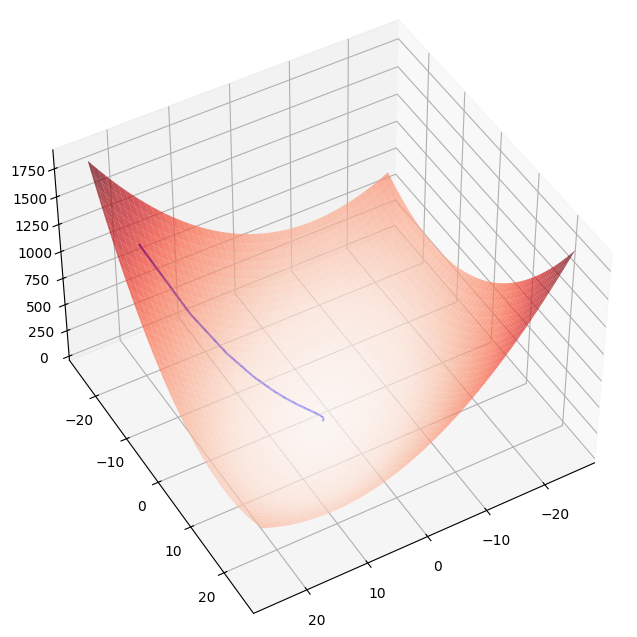

In [ ]:
# Run optimizer
grad_points = keras_optimizer_tape(trid_func, SGD, initial_guess=[20.0, -20.0])

# Get gradient points
grad_points = np.array(grad_points)
x, y, z = grad_points[:,0], grad_points[:,1], grad_points[:,2]

# Get function mesh points
x1 = np.linspace(-25, 25, 100)
x2 = np.linspace(-25, 25, 100)
x1, x2 = np.meshgrid(x1, x2)

# Plot graph
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(x1,x2, trid_func(x1,x2), cmap="Reds", alpha=0.7)
ax.plot(x, y, z, color="blue")
ax.view_init(elev=45, azim=60)

In [ ]:
# Mesh points
x1 = np.linspace(-25, 25, 100)
x2 = np.linspace(-25, 25, 100)
initial_guess=[0.1,0.1]
optimizer = tf.keras.optimizers.SGD

def optimize_and_plot(test_func, x1=x1, x2=x2, optimizer=optimizer, initial_guess=initial_guess, xlim=None):
    # Run optimizer
    grad_points = keras_optimizer_tape(test_func, optimizer=optimizer, initial_guess=initial_guess)

    # Get gradient points
    grad_points = np.array(grad_points)
    x, y, z = grad_points[:,0], grad_points[:,1], grad_points[:,2]

    # Mesh x1, and x2 points
    x1, x2 = np.meshgrid(x1, x2)

    # Plot graph
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection="3d")
    ax.plot_surface(x1,x2, test_func(x1,x2), cmap="Reds", alpha=0.7)
    ax.plot(x, y, z, color="blue")
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_zlabel("y")
    ax.set_xlim(xlim)
    ax.view_init(elev=45, azim=60)
    plt.show()

Iter 100 - x1 = -0.090199, x2 = 0.711318, y = -1.031613
Converged on 102th iteration

Final: x1 = -0.090337, x2 = 0.713125
At x1 & x2, y = -1.031626


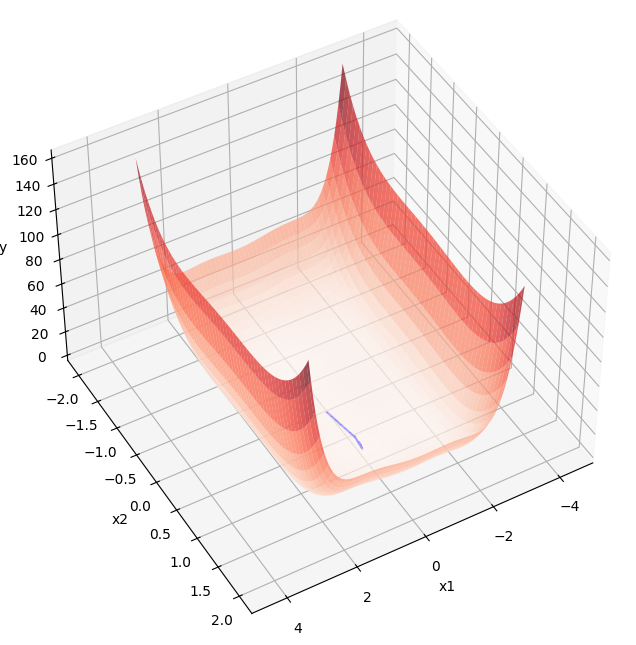

In [182]:
x1 = np.linspace(-3, 3, 100)
x2 = np.linspace(-2, 2, 100)
initial_guess=[-2.0, -4.0]
optimizer = tf.keras.optimizers.SGD

optimize_and_plot(six_hump_camel_func, x1, x2, optimizer=Momentum, xlim=[-5, 5])

